In [1]:
import pandas as pd
import numpy as np
from glob import glob 
import sys
sys.path += ["../src"]
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as sbp
from sklearn.preprocessing import StandardScaler
import pickle
from pyfixest.estimation import feols


In [2]:
def lr_price(df):
    vars = df.drop(columns = ["x", "y", "log_price"]).columns
    eq_regr_price = f'log_price ~ {" + ".join(list(vars))}'
    
    reg_price = feols(fml = eq_regr_price, data = df, drop_intercept = False)

    return reg_price 

In [3]:
all_corr_coefs = {}
all_r2 = {}

for file in sorted(glob(f'/data/housing/data/intermediate/jl_pop_synth/isp_baselines/all_baselines_*.pickle')):
    
    prov = file.split(".")[-2][-2:]
    if prov == "FE":
        break
    all_corr_coefs[prov] = {}
    all_r2[prov] = {}

    with open(file, 'rb') as f:
        data = pickle.load(f)

    for k in data:
        if "95" not in k:
            try:
                lr_prov = lr_price(data[k])
                coef_k = lr_prov.coef()
                all_corr_coefs[prov][k] = coef_k
                all_r2[prov][k] = np.corrcoef(lr_prov.predict(data["df_real"].drop(columns = ["log_price", "x", "y"])), data["df_real"]["log_price"])[1,0] ** 2
            except:
                all_corr_coefs[prov][k] = None
                all_r2[prov][k] = None

            

/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['ANNO_COSTRUZIONE_Missing', 'Missing_energy_class', 'COD_CAT_A_04_05', 'floor_plus_4', 'flag_multi_floor_Missing'].
            The variables are dropped from the model.
            
  warnings.warn(
/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['flag_multi_floor', 'ANNO_COSTRUZIONE_2005_2025', 'ANNO_COSTRUZIONE_Missing', 'Missing_energy_class', 'COD_CAT_A_04_05', 'floor_0.0', 'floor_1.0', 'floor_2.0', 'floor_3.0', 'floor_Missing', 'floor_plus_4'].
            The variables are dropped from the model.
            
  warnings.warn(
/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['ANNO_CO

In [4]:
df_corr_coefs = pd.DataFrame({prov: pd.DataFrame(all_corr_coefs[prov]).corr().iloc[0] for prov in all_corr_coefs}).T
df_r2 = pd.DataFrame(all_r2).T

In [8]:
#df_r2.to_csv(f'/data/housing/data/intermediate/jl_pop_synth/utility_r2_regression_vs_real_price_isp.csv')

<Axes: >

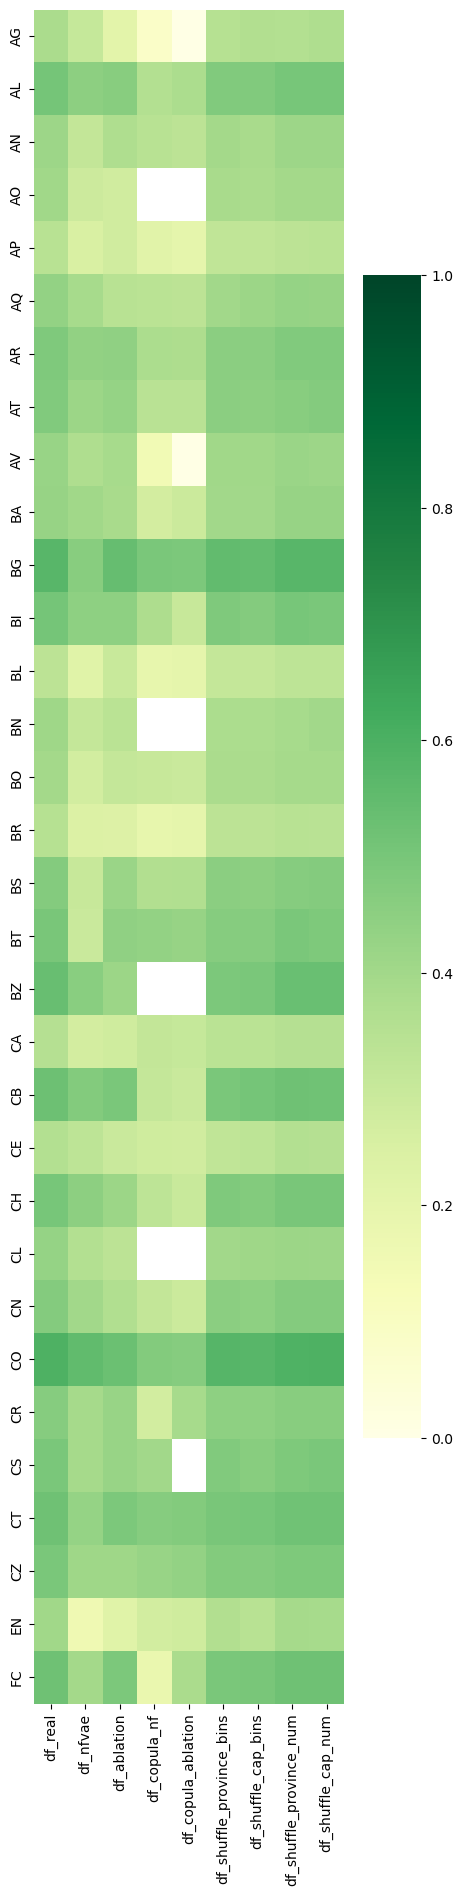

In [5]:
fig, axes= sbp(figsize = (5,22))
sns.heatmap(df_r2, cmap = "YlGn", vmin = 0, vmax = 1)

In [6]:
df_r2.dropna().median().sort_values()

df_copula_ablation          0.308196
df_copula_nf                0.315166
df_nfvae                    0.392311
df_ablation                 0.408448
df_shuffle_cap_bins         0.448424
df_shuffle_province_bins    0.454667
df_shuffle_province_num     0.463590
df_shuffle_cap_num          0.469271
df_real                     0.470318
dtype: float64

In [7]:
df_corr_coefs.dropna().median().sort_values(), df_corr_coefs.dropna().std().sort_values() 

(df_nfvae                    0.992378
 df_copula_nf                0.992405
 df_ablation                 0.992836
 df_copula_ablation          0.993007
 df_shuffle_cap_bins         0.995682
 df_shuffle_province_bins    0.997218
 df_shuffle_cap_num          0.999157
 df_shuffle_province_num     0.999182
 df_real                     1.000000
 dtype: float64,
 df_real                     0.000000
 df_shuffle_province_num     0.001104
 df_shuffle_cap_num          0.005716
 df_nfvae                    0.006206
 df_shuffle_province_bins    0.006423
 df_shuffle_cap_bins         0.007451
 df_ablation                 0.007646
 df_copula_ablation          0.026585
 df_copula_nf                0.323915
 dtype: float64)

<Axes: xlabel='method', ylabel='distance'>

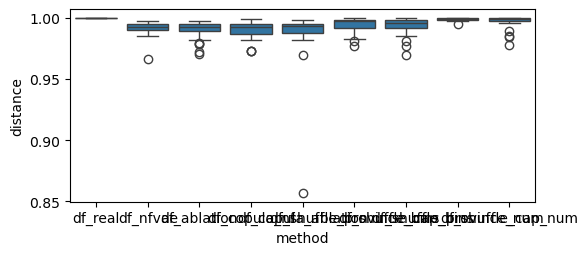

In [8]:
fig, axes = sbp(figsize = (6, 2.5))
sns.boxplot(data = df_corr_coefs.dropna().T.stack().reset_index().rename(columns = {"level_0": "method", 0: "distance"}).query("distance > 0"), x = "method", y = "distance")


In [3]:
file = sorted(glob(f'/data/housing/data/intermediate/jl_pop_synth/isp_baselines/all_baselines_*.pickle'))[0]

with open(file, 'rb') as f:
    data = pickle.load(f)

In [27]:
lr_methods = {method: lr_price(data[method]) for method in data}

/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['ANNO_COSTRUZIONE_Missing', 'Missing_energy_class', 'COD_CAT_A_04_05', 'floor_plus_4', 'flag_multi_floor_Missing'].
            The variables are dropped from the model.
            
  warnings.warn(
/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['ANNO_COSTRUZIONE_Missing', 'Missing_energy_class', 'COD_CAT_A_04_05', 'floor_plus_4', 'flag_multi_floor_Missing'].
            The variables are dropped from the model.
            
  warnings.warn(
/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['flag_multi_floor', 'ANNO_COSTRUZIONE_2005_2025', 'ANNO_COSTRUZIONE_Missing', 'Missing_energy_class

In [34]:
df_coefs = pd.DataFrame({method: lr_methods[method].coef() for method in lr_methods if "95" not in method}).fillna(0)

In [39]:
df_coefs.corr()

,df_real,df_nfvae,df_ablation,df_ipf,df_copula_nf,df_copula_ablation
df_real,1.000000,0.985700,0.973141,0.993487,0.986810,0.988740
df_nfvae,0.985700,1.000000,0.989640,0.974769,0.991959,0.990966
df_ablation,0.973141,0.989640,1.000000,0.963348,0.993252,0.991857
df_ipf,0.993487,0.974769,0.963348,1.000000,0.977763,0.980310
df_copula_nf,0.986810,0.991959,0.993252,0.977763,1.000000,0.999783
df_copula_ablation,0.988740,0.990966,0.991857,0.980310,0.999783,1.000000


<Axes: ylabel='Coefficient'>

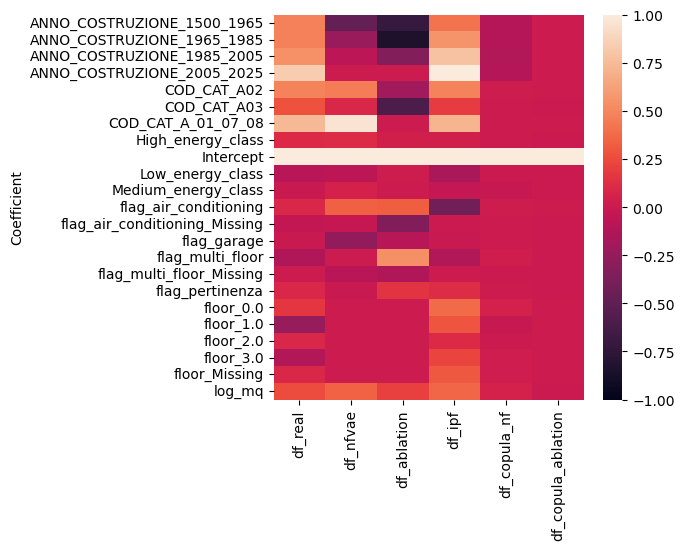

In [35]:
fig, axes = sbp(figsize = (5,5))

sns.heatmap(df_coefs, vmin = -1, vmax = 1)

In [4]:
df = data["df_real"]

In [6]:
vars = df.drop(columns = ["x", "y", "log_price"]).columns

In [7]:
vars

Index(['flag_garage', 'flag_pertinenza', 'flag_air_conditioning',
       'flag_multi_floor', 'log_mq', 'ANNO_COSTRUZIONE_1500_1965',
       'ANNO_COSTRUZIONE_1965_1985', 'ANNO_COSTRUZIONE_1985_2005',
       'ANNO_COSTRUZIONE_2005_2025', 'ANNO_COSTRUZIONE_Missing',
       'High_energy_class', 'Low_energy_class', 'Medium_energy_class',
       'Missing_energy_class', 'COD_CAT_A02', 'COD_CAT_A03',
       'COD_CAT_A_01_07_08', 'COD_CAT_A_04_05', 'floor_0.0', 'floor_1.0',
       'floor_2.0', 'floor_3.0', 'floor_Missing', 'floor_plus_4',
       'flag_air_conditioning_Missing', 'flag_multi_floor_Missing'],
      dtype='object')

In [9]:
eq_regr_price = f'log_price ~ {" + ".join(list(vars))}'
    
reg_price = feols(fml = eq_regr_price, data = df, drop_intercept = False) 

/home/jlenti/miniconda3/envs/synpop/lib/python3.11/site-packages/pyfixest/estimation/feols_.py:2328: UserWarning: 
            The following variables are collinear: ['ANNO_COSTRUZIONE_Missing', 'Missing_energy_class', 'COD_CAT_A_04_05', 'floor_plus_4', 'flag_multi_floor_Missing'].
            The variables are dropped from the model.
            
  warnings.warn(


In [13]:
reg_price.coef()

Coefficient
Intercept                        9.236829
flag_garage                     -0.011302
flag_pertinenza                  0.078693
flag_air_conditioning            0.078464
flag_multi_floor                -0.136246
log_mq                           0.254282
ANNO_COSTRUZIONE_1500_1965       0.475342
ANNO_COSTRUZIONE_1965_1985       0.468963
ANNO_COSTRUZIONE_1985_2005       0.539186
ANNO_COSTRUZIONE_2005_2025       0.832339
High_energy_class                0.097132
Low_energy_class                -0.093460
Medium_energy_class             -0.014020
COD_CAT_A02                      0.482594
COD_CAT_A03                      0.276915
COD_CAT_A_01_07_08               0.741682
floor_0.0                        0.158720
floor_1.0                       -0.243914
floor_2.0                        0.078321
floor_3.0                       -0.123450
floor_Missing                    0.089904
flag_air_conditioning_Missing   -0.042140
Name: Estimate, dtype: float64